# CSE381: ASSIGNMENT 1
## Fall 2022
### Sohayla Ihab Hamed----19P7343

#### _______________
#### QUESTION 1: 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# GENERATE DATASET X1: 400 samples, 2D, 2 classes, divided equally into halves

n_cluster = 2 
n_feature = 2
_n = 200
n_sample = _n * n_cluster

In [5]:
# 2 samples and their means, mu1 and mu2 respectively with a common covariance, sigma

S1 = np.matrix('0.3, 1.5 ; 1.5, 9.0')
S2 = np.matrix('0.3, 1.5 ; 1.5, 9.0')

X1_mu1 = np.array([-8, 8])
X1_mu2 = np.array([8, 8])

X1_np_means = np.array([X1_mu1,X1_mu2])
X1_np_sigmas = np.array([S1,S2])

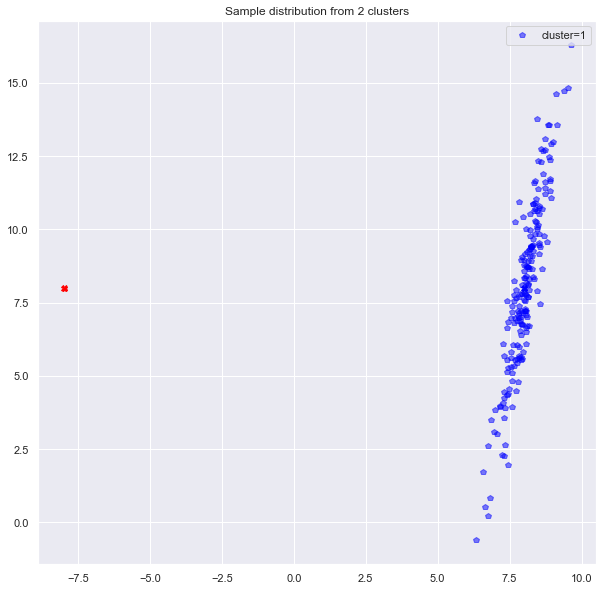

In [37]:
# Draw the graph using matplotlib

X1_colors = np.array(["red","blue"])
npX1 = []
plt.figure(figsize=(10,10))
for icluster in range(n_cluster):
    color1 = X1_colors[icluster]
    X1_npmean = X1_np_means[icluster]
    X1_s_cluster = np.random.multivariate_normal(X1_npmean,X1_np_sigmas[icluster],_n)
    npX1.extend(X1_s_cluster)
    plt.plot(X1_npmean[0],X1_npmean[1],"X",color=color1)

plt.plot(X1_s_cluster[:,0],X1_s_cluster[:,1],"p",alpha=0.5,color=color1,label="cluster={}".format(icluster))
plt.title("Sample distribution from {} clusters".format(n_cluster))
plt.legend()
plt.show()

In [8]:
# Print overview of data
GT1 = [0 for _ in range(_n)] + [1 for _ in range(_n)]
npX1 = np.array(npX1)
print("npX1: Data Dimension = (n_sample, n_features) = {}".format(npX1.shape))
print("X1_np_means: Data Dimension = (n_cluster, n_features) = {}".format(X1_np_means.shape))
print("X1_np_sigmas: Data Dimension = (n_cluster, n_features, n_features) = {}".format(X1_np_sigmas.shape))

for icluster in range(n_cluster):
    print("\n***CLUSTER={}***".format(icluster))
    print("--MEAN, MU:")
    print(X1_np_means[icluster])
    print("--COVARIANCE, SIGMA:")
    print(X1_np_sigmas[icluster])

npX1: Data Dimension = (n_sample, n_features) = (400, 2)
X1_np_means: Data Dimension = (n_cluster, n_features) = (2, 2)
X1_np_sigmas: Data Dimension = (n_cluster, n_features, n_features) = (2, 2, 2)

***CLUSTER=0***
--MEAN, MU:
[-8  8]
--COVARIANCE, SIGMA:
[[0.3 1.5]
 [1.5 9. ]]

***CLUSTER=1***
--MEAN, MU:
[8 8]
--COVARIANCE, SIGMA:
[[0.3 1.5]
 [1.5 9. ]]


In [9]:
# Perform PCA on the first data set, X1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [11]:
from sklearn.decomposition import PCA
X1_pca = PCA(n_components=2)
X1_pca.fit(X1_s_cluster)

PCA(n_components=2)

In [12]:
print(X1_pca.components_)

[[ 0.16634649  0.98606736]
 [-0.98606736  0.16634649]]


In [13]:
print(X1_pca.explained_variance_)

[8.3957176  0.04953931]


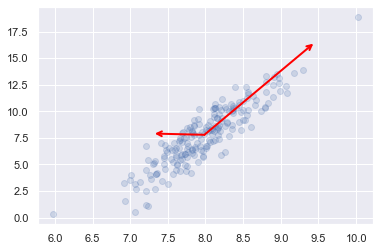

In [26]:
def draw_vector(v0, v1, axes=None):
    axes = axes or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2,color='red',shrinkA=0, shrinkB=0)
    axes.annotate('', v1, v0, arrowprops=arrowprops)

    
plt.scatter(X1_s_cluster[:, 0], X1_s_cluster[:, 1], alpha=0.2)
for length, vector in zip(X1_pca.explained_variance_, X1_pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(X1_pca.mean_, X1_pca.mean_ + v)
plt.axis('auto');

In [20]:
#PCA of X1 to reduce dimensionality problem(project on first principal cmp such that best 1D shape)
pca_1 = PCA(n_components=1)
pca_1.fit(X1_s_cluster)
X1_trans_pca = pca_1.transform(X1_s_cluster)
print("original shape:   ", X1_s_cluster.shape)
print("transformed shape:", X1_trans_pca.shape)


original shape:    (200, 2)
transformed shape: (200, 1)


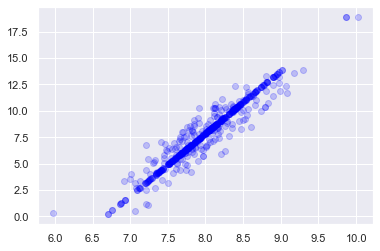

In [28]:
X1_new = pca_1.inverse_transform(X1_trans_pca)
plt.scatter(X1_s_cluster[:, 0], X1_s_cluster[:, 1], alpha=0.2, color='blue')
plt.scatter(X1_new[:, 0], X1_new[:, 1], alpha=0.4, color='blue')
plt.axis('auto');

#### _________________
#### QUESTION 2: 

In [29]:
# GENERATE DATASET X2: 400 samples, 2D, 2 classes, divided equally into halves

n_cluster_2 = 2 
n_feature_2 = 2
_n_2 = 200
n_sample_2 = _n_2 * n_cluster_2

In [30]:
# 2 samples and their means, mu1 and mu2 respectively with a common covariance, sigma

S1 = np.matrix('0.3, 1.5 ; 1.5, 9.0')
S2 = np.matrix('0.3, 1.5 ; 1.5, 9.0')

X2_mu1 = np.array([-1, 0])
X2_mu2 = np.array([1, 0])

X2_np_means = np.array([X2_mu1,X2_mu2])
X2_np_sigmas = np.array([S1,S2])

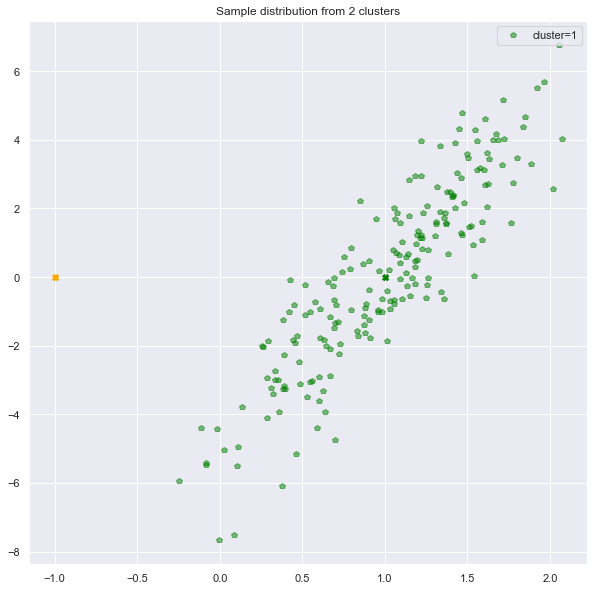

In [36]:
# Draw the graph using matplotlib

X2_colors = np.array(["orange","green"])
npX2 = []
plt.figure(figsize=(10,10))
for icluster_2 in range(n_cluster_2):
    color2 = X2_colors[icluster_2]
    X2_npmean = X2_np_means[icluster_2]
    X2_s_cluster = np.random.multivariate_normal(X2_npmean,X2_np_sigmas[icluster_2],_n_2)
    npX2.extend(X2_s_cluster)
    plt.plot(X2_npmean[0],X2_npmean[1],"X",color=color2)

plt.plot(X2_s_cluster[:,0],X2_s_cluster[:,1],"p",alpha=0.5,color=color2,label="cluster={}".format(icluster_2))
plt.title("Sample distribution from {} clusters".format(n_cluster_2))
plt.legend()
plt.show()

In [32]:
# Print overview of data
GT2 = [0 for _ in range(_n_2)] + [1 for _ in range(_n_2)]
npX2 = np.array(npX2)
print("npX2: Data Dimension = (n_sample_2, n_features_2) = {}".format(npX2.shape))
print("X2_np_means: Data Dimension = (n_cluster_2, n_features_2) = {}".format(X2_np_means.shape))
print("X2_np_sigmas: Data Dimension = (n_cluster_2, n_features_2, n_features_2) = {}".format(X2_np_sigmas.shape))

for icluster_2 in range(n_cluster_2):
    print("\n***CLUSTER={}***".format(icluster_2))
    print("--MEAN, MU:")
    print(X2_np_means[icluster_2])
    print("--COVARIANCE, SIGMA:")
    print(X2_np_sigmas[icluster_2])

npX2: Data Dimension = (n_sample_2, n_features_2) = (400, 2)
X2_np_means: Data Dimension = (n_cluster_2, n_features_2) = (2, 2)
X2_np_sigmas: Data Dimension = (n_cluster_2, n_features_2, n_features_2) = (2, 2, 2)

***CLUSTER=0***
--MEAN, MU:
[-1  0]
--COVARIANCE, SIGMA:
[[0.3 1.5]
 [1.5 9. ]]

***CLUSTER=1***
--MEAN, MU:
[1 0]
--COVARIANCE, SIGMA:
[[0.3 1.5]
 [1.5 9. ]]


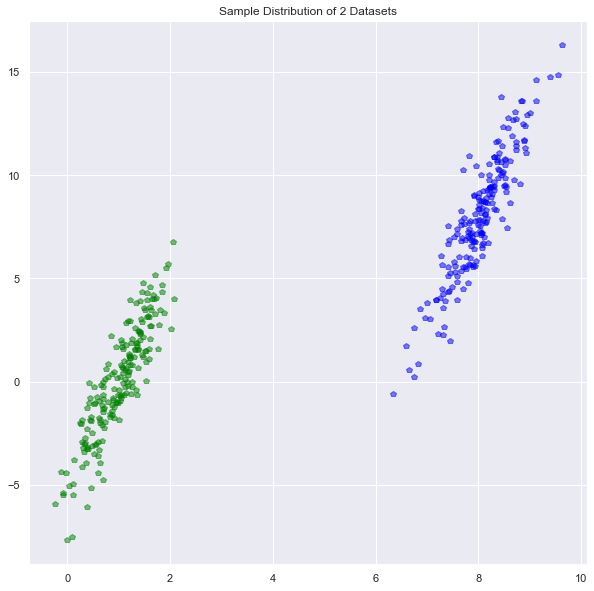

In [63]:
#PLOT BOTH ON SAME GRAPH
plt.figure(figsize=(10,10));
plt.plot(X1_s_cluster[:,0],X1_s_cluster[:,1],"p",alpha=0.5,color=color1,label="cluster={}".format(icluster))    
plt.plot(X2_s_cluster[:,0],X2_s_cluster[:,1],"p",alpha=0.5,color=color2,label="cluster={}".format(icluster_2))
plt.title("Sample Distribution of 2 Datasets")
plt.show()

In [44]:
# Perform PCA on the second data set, X2
X2_pca = PCA(n_components=2)
X2_pca.fit(X2_s_cluster)

PCA(n_components=2)

In [45]:
print(X2_pca.components_)

[[-0.1628779  -0.98664623]
 [ 0.98664623 -0.1628779 ]]


In [46]:
print(X2_pca.explained_variance_)

[7.64920648 0.04799101]


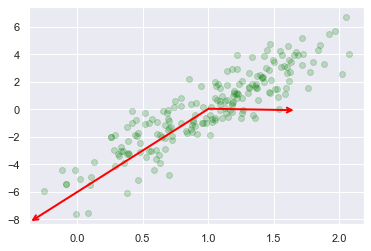

In [49]:
plt.scatter(X2_s_cluster[:, 0], X2_s_cluster[:, 1], alpha=0.2, color='green')
for length, vector in zip(X2_pca.explained_variance_, X2_pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(X2_pca.mean_, X2_pca.mean_ + v)
plt.axis('auto');

In [48]:
#PCA of X2 to reduce dimensionality problem(project on first principal cmp such that best 1D shape)
pca_2 = PCA(n_components=1)
pca_2.fit(X2_s_cluster)
X2_trans_pca = pca_2.transform(X2_s_cluster)
print("original shape:   ", X2_s_cluster.shape)
print("transformed shape:", X2_trans_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


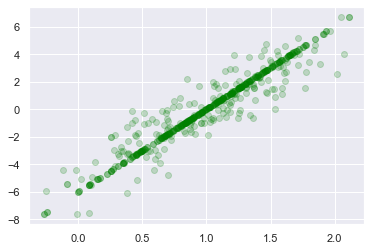

In [58]:
X2_new = pca_2.inverse_transform(X2_trans_pca)
plt.scatter(X2_s_cluster[:, 0], X2_s_cluster[:, 1], alpha=0.2, color='green')
plt.scatter(X2_new[:, 0], X2_new[:, 1], alpha=0.4, color='green')
plt.axis('auto');

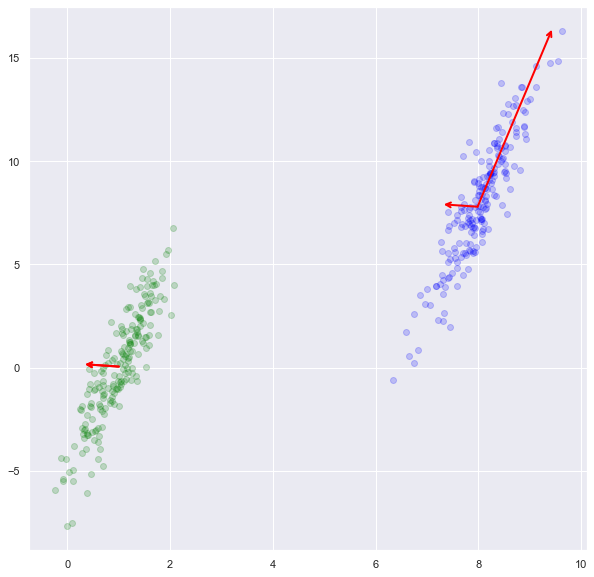

In [62]:
#PCA GRAPH OF BOTH DATASETS
plt.figure(figsize=(10,10));
plt.scatter(X1_s_cluster[:, 0], X1_s_cluster[:, 1], alpha=0.2, color='blue')
for length, vector in zip(X1_pca.explained_variance_, X1_pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(X1_pca.mean_, X1_pca.mean_ + v)

plt.scatter(X2_s_cluster[:, 0], X2_s_cluster[:, 1], alpha=0.2, color='green')
for length, vector in zip(X2_pca.explained_variance_, X2_pca.components_):
    draw_vector(X2_pca.mean_, X2_pca.mean_ + v)
    
    
plt.axis('auto');

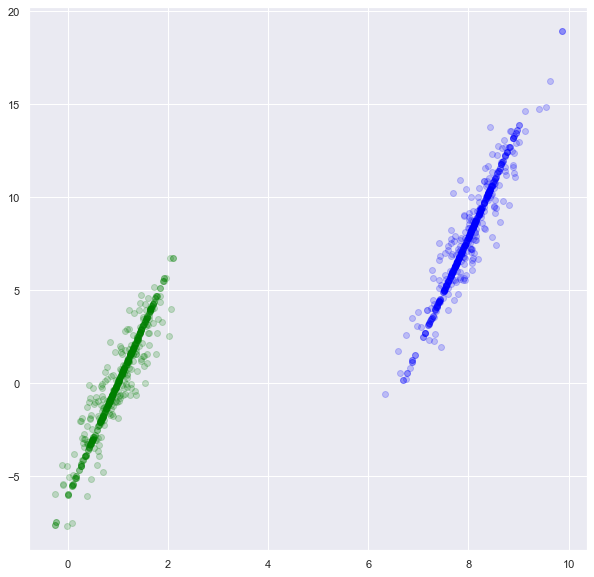

In [61]:
#PROJECTION OF BOTH DATASETS
plt.figure(figsize=(10,10));
plt.scatter(X1_s_cluster[:, 0], X1_s_cluster[:, 1], alpha=0.2, color='blue')
plt.scatter(X1_new[:, 0], X1_new[:, 1], alpha=0.4, color='blue')

plt.scatter(X2_s_cluster[:, 0], X2_s_cluster[:, 1], alpha=0.2, color='green')
plt.scatter(X2_new[:, 0], X2_new[:, 1], alpha=0.4, color='green')

plt.axis('auto');